In [1]:

# we have the rectangular region given (square) between 0 and 1

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

In [2]:
# Returns the coordinates of all four corners of a rectangle, in cyclic order

def rectangle_from_corners(p1, p2):
    p3 = [p1[0], p2[1]]
    p4 = [p2[0], p1[1]]
    return np.array([p1, p3, p2, p4])
# Checks condition (a) of Theorem 2:
# that g(R)⊆ R



# Plots both rectangles R and g(R)
# p1, p2 are opposite corners of the R region rectangle
# q1, q2 are the opposite corners of the g(R) region rectangle

def check_condition_a(p1, p2, q1, q2, plot_regions=True):
    # check that g(R) is within R
    # Depends how user placed p1, p2 in defining the rectangle
    bottom_left = np.minimum(p1, p2)
    top_right = np.maximum(p1, p2)
    condition = np.all(q1 >= bottom_left) and np.all(q2 <= top_right)
    # No need to find the BL and TR of g(R), as any configurations
    # of qs will work in finding if g(R) is in R
    # now plot the rectangles
    
    
    if plot_regions:
        r = rectangle_from_corners(p1, p2)
        plt.fill(r[:, 0], r[:, 1], 'b', alpha=0.3)
        r = rectangle_from_corners(q1, q2)
        plt.fill(r[:, 0], r[:, 1], 'b', alpha=0.6)

        if condition:
            plt.title('g maps R into itself')
        else:
            plt.title('g does not map R into itself')

    return condition



# Calculate the matrix Gmax, 
# Then check the 2-norm of Gmax is less than 1

True

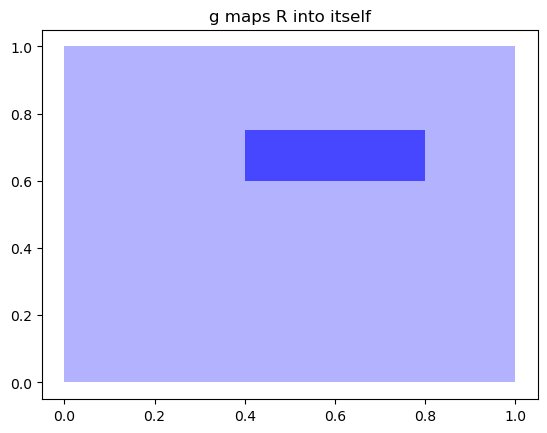

In [3]:
# Define corners of rectangular region R
p1 = np.array([0, 0])
p2 = np.array([1, 1])

x_range = np.linspace(p1[0], p2[0], 101)
y_range = np.linspace(p1[1], p2[1], 101)

X, Y = np.meshgrid(x_range, y_range)

g1 = -0.4*X*Y**2+0.8
g2 = 3/(X**2+4)
q1 = np.array([np.min(g1), np.min(g2)])
q2 = np.array([np.max(g1), np.max(g2)])

check_condition_a(p1, p2, q1, q2)

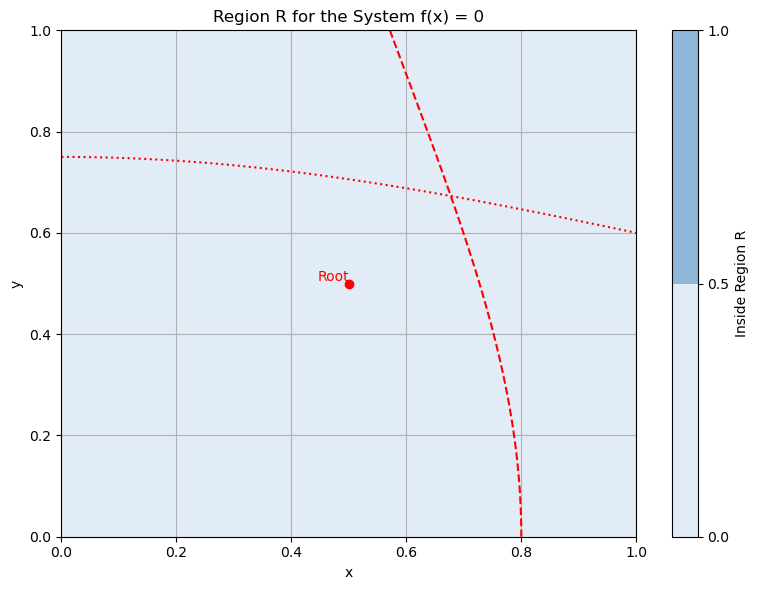

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions f1(x, y) and f2(x, y)
def f1(x, y):
    return 5*x + 2*x*y**2 - 4

def f2(x, y):
    return x**2*y + 4*y - 3

# Define the region R
x_range = np.linspace(0, 1, 400)
y_range = np.linspace(0, 1, 400)
X, Y = np.meshgrid(x_range, y_range)

# Plot the region R
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, (f1(X, Y) == 0) & (f2(X, Y) == 0), cmap='Blues', alpha=0.5)
plt.title('Region R for the System f(x) = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Inside Region R')

# Plot the contour lines for f1(x, y) = 0 and f2(x, y) = 0
plt.contour(X, Y, f1(X, Y), levels=[0], colors='r', linestyles='dashed')
plt.contour(X, Y, f2(X, Y), levels=[0], colors='r', linestyles='dotted')

# Plot the root of the system f(x) = 0
plt.plot(0.5, 0.5, 'ro')  # Approximate location for the root
plt.text(0.5, 0.5, 'Root', verticalalignment='bottom', horizontalalignment='right', color='r')

plt.grid(True)
plt.tight_layout()
plt.show()



In [7]:
# Finding the fixed point of the iterative scheme g(x)
def g1(x, y):
    return -0.4*x*y**2 + 0.8

def g2(x, y):
    return 3 / (x**2 + 4)

# Solving g(x) = x to find the fixed point
def find_fixed_point():
    # Use an initial guess for x and y
    x_guess, y_guess = 0.5, 0.5
    tol = 1e-6  # Tolerance for convergence
    max_iter = 1000  # Maximum number of iterations

    for _ in range(max_iter):
        x_new, y_new = g1(x_guess, y_guess), g2(x_guess, y_guess)
        if abs(x_new - x_guess) < tol and abs(y_new - y_guess) < tol:
            return x_new, y_new
        x_guess, y_guess = x_new, y_new

    return None  # If no fixed point found within max_iter

fixed_point = find_fixed_point()
if fixed_point:
    print("Fixed Point found at (x, y) =", fixed_point)
else:
    print("No Fixed Point found within the specified tolerance.")


Fixed Point found at (x, y) = (0.6773468325262975, 0.6728267896363793)


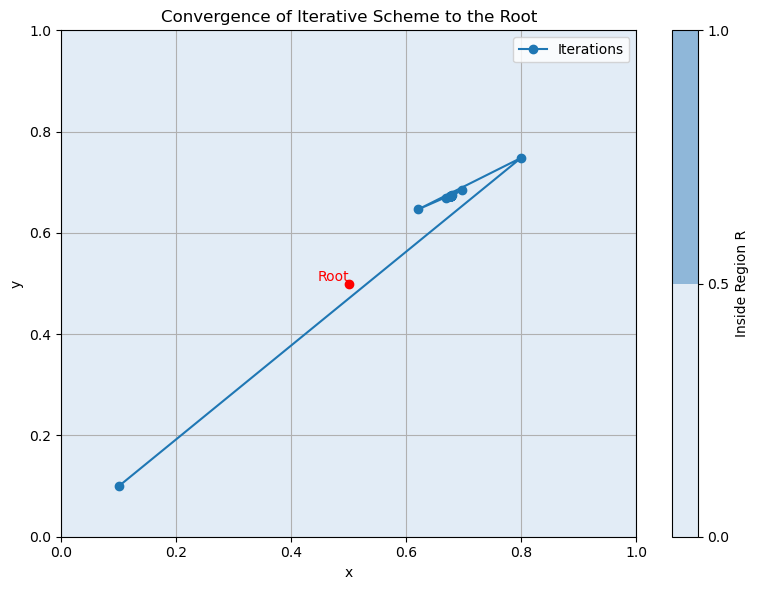

In [8]:
# Showing convergence of the iterative scheme to the root identified in first part 
def check_convergence():
    # Choose a starting point inside the region R
    x_start, y_start = 0.1, 0.1
    num_iterations = 20

    x_values, y_values = [x_start], [y_start]
    for _ in range(num_iterations):
        x_new, y_new = g1(x_values[-1], y_values[-1]), g2(x_values[-1], y_values[-1])
        x_values.append(x_new)
        y_values.append(y_new)

    return x_values, y_values

x_convergence, y_convergence = check_convergence()

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, (f1(X, Y) == 0) & (f2(X, Y) == 0), cmap='Blues', alpha=0.5)
plt.title('Convergence of Iterative Scheme to the Root')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Inside Region R')
plt.plot(x_convergence, y_convergence, '-o', label='Iterations')
plt.plot(0.5, 0.5, 'ro')  # Approximate location for the root
plt.text(0.5, 0.5, 'Root', verticalalignment='bottom', horizontalalignment='right', color='r')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
import numpy as np
from scipy.optimize import root, minimize
from scipy.optimize import broyden1, anderson
from scipy.optimize import newton_krylov
from scipy.optimize import rosen, rosen_der, rosen_hess

# Define the system of non-linear equations
def f(x):
    f1 = 3 * np.sin(np.pi * x[0]) - 2 * x[2]**2 - 2
    f2 = x[0]**2 + x[1]**2 - x[2]
    f3 = 2 * x[0]**2 + 2 * x[1]**2 - 4 * x[0] * x[1] - x[0] + x[1]
    return [f1, f2, f3]

# Determine the number of roots in the region R and identify them
# Use root function to find roots within the region R
sol = root(f, [0.5, 0.5, 0.5], method='hybr')
if sol.success:
    print("Root found at:", sol.x)
else:
    print("No root found.")



Root found at: [0.58005004 0.58005004 0.6729161 ]


In [10]:
# Compare the efficiency of different root-finding methods
# Choose one of the roots found for comparison
x0 = sol.x

# Powell's method
print("\nPowell's Method:")
res_powell = minimize(lambda x: np.linalg.norm(f(x)), x0, method='powell')
print("Root found by Powell's method:", res_powell.x)



Powell's Method:
Root found by Powell's method: [0.58005004 0.58005004 0.6729161 ]


In [11]:
# Broyden's method
print("\nBroyden's Method:")
res_broyden = broyden1(lambda x: np.array(f(x)), x0)
print("Root found by Broyden's method:", res_broyden)



Broyden's Method:
Root found by Broyden's method: [0.58005004 0.58005004 0.6729161 ]


C:\Users\Craigs\anaconda3\Lib\site-packages\scipy\optimize\_nonlin.py:368: RuntimeWarning: invalid value encountered in scalar divide
  and dx_norm/self.x_rtol <= x_norm))
C:\Users\Craigs\anaconda3\Lib\site-packages\scipy\optimize\_nonlin.py:913: RuntimeWarning: invalid value encountered in divide
  d = v / vdot(df, v)


In [12]:
# Newton-Krylov method
print("\nNewton-Krylov Method:")
res_newton_krylov = newton_krylov(lambda x: np.array(f(x)), x0)
print("Root found by Newton-Krylov method:", res_newton_krylov)



Newton-Krylov Method:
Root found by Newton-Krylov method: [0.58005004 0.58005004 0.6729161 ]


In [6]:

%reset -f

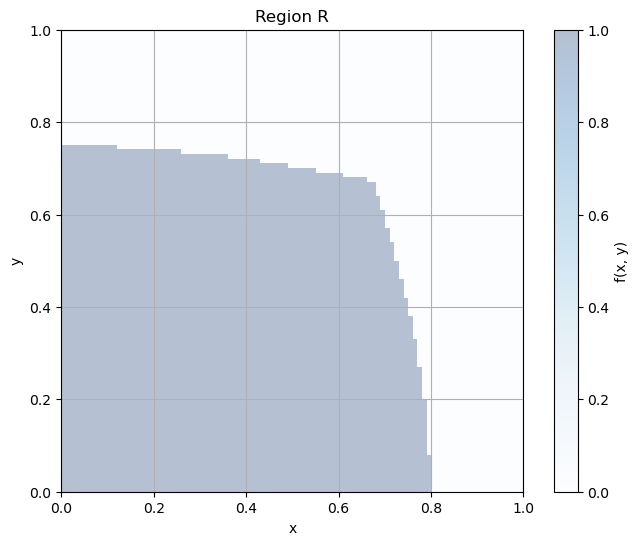

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions f1 and f2
def f1(x, y):
    return 5*x + 2*x*y**2 - 4

def f2(x, y):
    return x**2 * y + 4*y - 3

# Define the region R
x_range = np.linspace(0, 1, 100)
y_range = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_range, y_range)

# Evaluate the functions within the region R
Z1 = f1(X, Y)
Z2 = f2(X, Y)

# Plot the region R
plt.figure(figsize=(8, 6))
plt.imshow((Z1 <= 0) & (Z2 <= 0), extent=[0, 1, 0, 1], origin='lower', cmap='Blues', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Region R')
plt.colorbar(label='f(x, y)')
plt.grid(True)

plt.show()


In [1]:
import numpy as np

# Define the functions f1 and f2
def f1(x, y):
    return 5*x + 2*x*y**2 - 4

def f2(x, y):
    return x**2 * y + 4*y - 3

# Define the functions g1 and g2
def g1(x, y):
    return -0.4 * x * y**2 + 0.8

def g2(x, y):
    return 3 / (x**2 + 4)

# Define the region R
def in_region(x, y):
    return 0 <= x <= 1 and 0 <= y <= 1

# Find fixed point
def find_fixed_point(g1, g2):
    x = 0.5  # Starting point
    y = 0.5
    tolerance = 1e-6
    max_iterations = 1000
    for _ in range(max_iterations):
        x_next, y_next = g1(x, y), g2(x, y)
        if abs(x_next - x) < tolerance and abs(y_next - y) < tolerance:
            return x_next, y_next
        x, y = x_next, y_next
    return None
print()
# Find fixed point
fixed_point = find_fixed_point(g1, g2)
print("Fixed point:", fixed_point)
print()
# Check convergence from different starting points
starting_points = [(0.2, 0.8), (0.7, 0.3), (0.4, 0.4)]  # Different starting points in R
for start_point in starting_points:
    x, y = start_point
    iterations = 0
    max_iterations = 1000
    tolerance = 1e-6
    while in_region(x, y) and iterations < max_iterations:
        x_next, y_next = g1(x, y), g2(x, y)
        if abs(x_next - x) < tolerance and abs(y_next - y) < tolerance:
            print(f"Converged to root from starting point {start_point}: {x_next}, {y_next}")
            break
        x, y = x_next, y_next
        iterations += 1
    else:
        print(f"Did not converge from starting point {start_point} within {max_iterations} iterations.")




Fixed point: (0.6773468325262975, 0.6728267896363793)

Converged to root from starting point (0.2, 0.8): 0.6773471815595482, 0.672826978316073
Converged to root from starting point (0.7, 0.3): 0.6773468658863132, 0.6728268076298431
Converged to root from starting point (0.4, 0.4): 0.6773471837082562, 0.67282697947266


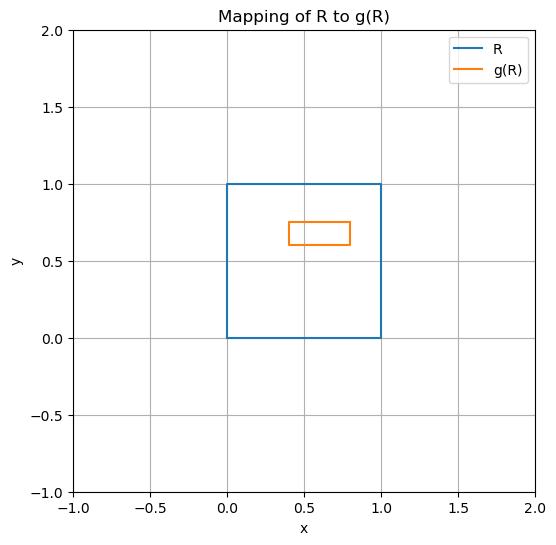

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions f1 and f2
def f1(x, y):
    return 5*x + 2*x*y**2 - 4

def f2(x, y):
    return x**2 * y + 4*y - 3

# Define the functions g1 and g2
def g1(x, y):
    return -0.4 * x * y**2 + 0.8

def g2(x, y):
    return 3 / (x**2 + 4)

# Define the region R
def plot_box(ax, p1, p2, label):
    ax.plot([p1[0], p1[0], p2[0], p2[0], p1[0]], 
            [p1[1], p2[1], p2[1], p1[1], p1[1]], 
            label=label)

# Plot the region R and g(R)
fig, ax = plt.subplots(figsize=(8, 6))

# Define corners of rectangular region R
p1 = np.array([0.0, 0.0])  # Bottom-left corner
p2 = np.array([1.0, 1.0])  # Top-right corner

# Plot R
plot_box(ax, p1, p2, label='R')

# Define corners of g(R)
q1 = np.array([g1(p1[0], p1[1]), g2(p1[0], p1[1])])
q2 = np.array([g1(p2[0], p2[1]), g2(p2[0], p2[1])])

# Plot g(R)
plot_box(ax, q1, q2, label='g(R)')

# Plot formatting
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
ax.set_aspect('equal', 'box')
ax.legend()
ax.grid(True)
plt.title('Mapping of R to g(R)')
plt.xlabel('x')
plt.ylabel('y')

plt.show()
